<font size="5">Naive Bayes</font>

In [42]:
import pandas as pd
import numpy as np

In [44]:
nb_df=pd.read_csv('data/min_max_scaled')

In [46]:
nb_df.head()

,Unnamed: 0,KIDSDRIV,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,TRAVTIME,BLUEBOOK,...,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,0,0.0,0.0,0.478261,0.183497,0.0,0.000000,0.0,0.065693,0.186547,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.478261,0.249159,0.0,0.290588,0.0,0.124088,0.196952,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.0,0.0,0.478261,0.144078,0.0,0.000000,0.0,0.153285,0.299971,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,0.0,0.2,0.434783,0.043699,0.0,0.140284,1.0,0.000000,0.036782,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4,0.0,0.0,0.608696,0.145844,0.0,0.345936,1.0,0.197080,0.204279,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
nb_df=nb_df.drop(columns=['Unnamed: 0','CLM_AMT'])

In [50]:
nb_df.head()

,KIDSDRIV,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,TRAVTIME,BLUEBOOK,TIF,...,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,0.0,0.0,0.478261,0.183497,0.0,0.000000,0.0,0.065693,0.186547,0.416667,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.478261,0.249159,0.0,0.290588,0.0,0.124088,0.196952,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.478261,0.144078,0.0,0.000000,0.0,0.153285,0.299971,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.2,0.434783,0.043699,0.0,0.140284,1.0,0.000000,0.036782,0.125000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.608696,0.145844,0.0,0.345936,1.0,0.197080,0.204279,0.250000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<font size="4">splitting dataset to independent and depend variables</font>

In [54]:
x=nb_df.drop(columns=['CLAIM_FLAG'])
x.head()

,KIDSDRIV,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,TRAVTIME,BLUEBOOK,TIF,...,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,0.0,0.0,0.478261,0.183497,0.0,0.000000,0.0,0.065693,0.186547,0.416667,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.478261,0.249159,0.0,0.290588,0.0,0.124088,0.196952,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.478261,0.144078,0.0,0.000000,0.0,0.153285,0.299971,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.2,0.434783,0.043699,0.0,0.140284,1.0,0.000000,0.036782,0.125000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.608696,0.145844,0.0,0.345936,1.0,0.197080,0.204279,0.250000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
y=nb_df['CLAIM_FLAG']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CLAIM_FLAG, dtype: float64

<font size="4">Split data into training and validation sets</font>

In [58]:
from sklearn.model_selection import train_test_split
# Split data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
x_train.shape, x_test.shape

((8241, 42), (2061, 42))

<font size="4">Train the model</font>

In [62]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [64]:
nb.fit(x_train,y_train)

MultinomialNB()

<font size="4">get prediction</font>

In [67]:
pred=nb.predict(x_test)
pred[:5]

array([0., 0., 0., 0., 1.])

<font size="4">True Labels</font>

In [69]:
y_test[:5]

3100     0.0
10109    1.0
7445     0.0
7769     0.0
3305     1.0
Name: CLAIM_FLAG, dtype: float64

<font size="4">Accuracy of the model</font>

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7782629791363416

<font size="4">Classification report</font>

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      1506
         1.0       0.64      0.40      0.49       555

    accuracy                           0.78      2061
   macro avg       0.72      0.66      0.67      2061
weighted avg       0.76      0.78      0.76      2061



<font size="4">Summary of the model</font>

Predictions: [0. 0. 0. 0. 1.]
True Labels: [0. 1. 0. 0. 1.]
Accuracy: 0.78
True Negatives (TN): 1384
False Positives (FP): 122
False Negatives (FN): 335
True Positives (TP): 220


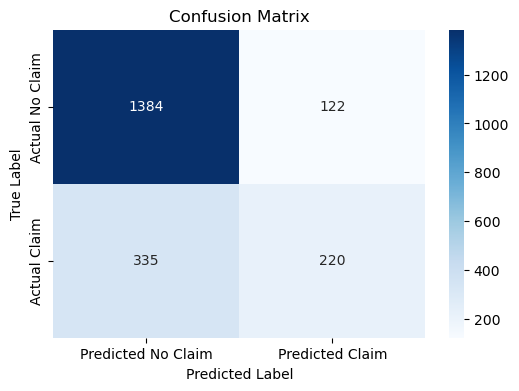

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Print first 5 predictions and corresponding true labels
print("Predictions:", pred[:5])
print("True Labels:", y_test[:5].values)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred)

# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm.ravel()

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No Claim', 'Predicted Claim'],
            yticklabels=['Actual No Claim', 'Actual Claim'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
